In [1]:
import pandas as pd
import numpy as np
import ast
import pickle
from pathlib import Path
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from scipy.stats import gaussian_kde
from scipy.signal import argrelextrema
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
import seaborn as sns
import spikeanal as spike

# It takes several steps to create the timestamp_dicts, refer to Ephys_Analysis_Notebook to create
timestamp_dicts = pickle.load(open('timestamp_dicts.pkl', 'rb'))

# Construct the path in a platform-independent way (HiPerGator or Windows)
ephys_path = Path('.') / 'export' / 'updated_phys' / 'non-novel' / 'all_non_novel'

ephys_data = spike.EphysRecordingCollection(str(ephys_path))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1-1_t1b2L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged.rec
<class

In [2]:
for recording in ephys_data.collection.keys():
    # Check if the recording key (without everything after subject #) is in timestamp_dicts
    start_pos = recording.find('subj_')
    # Add the length of 'subj_' and 3 additional characters to include after 'subj_'
    end_pos = start_pos + len('subj_') + 3
    # Slice the recording key to get everything up to and including the subject identifier plus three characters
    recording_key_without_suffix = recording[:end_pos]
    if recording_key_without_suffix in timestamp_dicts:
        # Assign the corresponding timestamp_dicts dictionary to event_dict
        ephys_data.collection[recording].event_dict = timestamp_dicts[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        subject = recording[start:start+3]
        
        # Assign the extracted subject
        ephys_data.collection[recording].subject = subject
        
spike_analysis = spike.SpikeAnalysis_MultiRecording(ephys_data, timebin = 100, smoothing_window=250, ignore_freq = 0.5)

All set to analyze


In [3]:
# Create df of spike freq 10s before and 10s during every event
event_spikes = spike_analysis.generate_event_dataframe()

# Identify 'Pre-event' and 'Event' columns
pre_event_cols = [col for col in event_spikes.columns if col.startswith('Pre-event')]
event_cols = [col for col in event_spikes.columns if col.startswith('Event') and col not in ['Event name', 'Event number']]

event_spikes

,Recording,Event name,Event number,Unit number,Pre-event timebin 1,Pre-event timebin 2,Pre-event timebin 3,Pre-event timebin 4,Pre-event timebin 5,Pre-event timebin 6,...,Event timebin 91,Event timebin 92,Event timebin 93,Event timebin 94,Event timebin 95,Event timebin 96,Event timebin 97,Event timebin 98,Event timebin 99,Event timebin 100
0,20230612_101430_standard_comp_to_training_D1_s...,rewarded,1,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20230612_101430_standard_comp_to_training_D1_s...,rewarded,2,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230612_101430_standard_comp_to_training_D1_s...,rewarded,3,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20230612_101430_standard_comp_to_training_D1_s...,rewarded,4,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20230612_101430_standard_comp_to_training_D1_s...,rewarded,5,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,16,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10016,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,17,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10017,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,18,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10018,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,19,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0


In [4]:
def analyze_firing_rates(df):
    # Define pre-event and event column names based on your description
    pre_event_cols = [col for col in event_spikes.columns if col.startswith('Pre-event')]
    event_cols = [col for col in event_spikes.columns if col.startswith('Event') and col not in ['Event name', 'Event number']]

    # Calculate mean firing rates before and after the event
    df['mean_pre_event'] = df[pre_event_cols].mean(axis=1)
    df['mean_event'] = df[event_cols].mean(axis=1)

    # Difference in firing rates
    df['diff_firing_rate'] = df['mean_event'] - df['mean_pre_event']

    # Bootstrap to assess the significance of the difference
    # We use a simple bootstrap here for the mean difference, but you can extend this
    results = []
    for i in range(1000):  # number of bootstrap samples
        sampled = df.sample(n=len(df), replace=True)
        mean_diff = sampled['mean_event'].mean() - sampled['mean_pre_event'].mean()
        results.append(mean_diff)

    # Calculate a 95% confidence interval from the bootstrap distribution
    ci_lower = np.percentile(results, 2.5)
    ci_upper = np.percentile(results, 97.5)

    return df, (ci_lower, ci_upper)

In [5]:
results_df, confidence_interval = analyze_firing_rates(event_spikes)
print("95% Confidence interval for mean differences:", confidence_interval)

95% Confidence interval for mean differences: (-0.13343937125748498, -0.027564371257485256)


In [6]:
def analyze_firing_rates2(df):
    # Dynamically define pre-event and event column names based on the DataFrame
    pre_event_cols = [col for col in df.columns if col.startswith('Pre-event')]
    event_cols = [col for col in df.columns if col.startswith('Event') and col not in ['Event name', 'Event number']]

    # Calculate mean firing rates before and after the event
    df['mean_pre_event'] = df[pre_event_cols].mean(axis=1)
    df['mean_event'] = df[event_cols].mean(axis=1)

    # Difference in firing rates
    df['diff_firing_rate'] = df['mean_event'] - df['mean_pre_event']

    # Define a function to calculate the mean difference from resampled data
    def mean_diff(data, axis=None):
        # data is expected to be 2D: rows are resamples, columns are [mean_pre_event, mean_event]
        # Compute mean difference along the specified axis
        return np.mean(data[:, 1] - data[:, 0], axis=axis)

    # Create an array of the data to be bootstrapped
    data = df[['mean_pre_event', 'mean_event']].to_numpy()

    # Ensure the data is 2-dimensional
    if data.ndim != 2 or data.shape[1] != 2:
        raise ValueError("Data array must be 2-dimensional with two columns.")

    # Using the bootstrap function to calculate the confidence interval
    res = bootstrap((data,), mean_diff, vectorized=True,
                    n_resamples=1000, method='percentile', confidence_level=0.95)

    # Extract the confidence interval
    confidence_interval = res.confidence_interval

    return df, confidence_interval

# Assuming 'event_spikes' is your DataFrame loaded with the appropriate data
results_df, confidence_interval = analyze_firing_rates2(event_spikes)
print("95% Confidence interval for mean differences:", confidence_interval)

95% Confidence interval for mean differences: ConfidenceInterval(low=-0.08781561876247553, high=-0.009928892215569082)


In [7]:
def mean_diff(data, axis=None):
    return np.mean(data[:, 1] - data[:, 0], axis=axis)

def analyze_group(df):
    # Calculate mean firing rates before and after the event
    pre_event_cols = [col for col in df.columns if col.startswith('Pre-event')]
    event_cols = [col for col in df.columns if col.startswith('Event') and col not in ['Event name', 'Event number']]
    df['mean_pre_event'] = df[pre_event_cols].mean(axis=1)
    df['mean_event'] = df[event_cols].mean(axis=1)
    data = df[['mean_pre_event', 'mean_event']].to_numpy()

    # Bootstrap analysis to get the confidence interval
    res = bootstrap((data,), mean_diff, vectorized=True, n_resamples=1000, method='percentile', confidence_level=0.95)
    
    return {
        'low': res.confidence_interval.low,
        'high': res.confidence_interval.high,
        'significant': not (res.confidence_interval.low <= 0 <= res.confidence_interval.high)
    }

# Group data by 'Recording', 'Event name', and 'Unit number'
grouped = event_spikes.groupby(['Recording', 'Event name', 'Unit number'])

# Apply analysis to each group
results = grouped.apply(analyze_group)

# Results will be a DataFrame with a MultiIndex (Recording, Event name, Unit number)
print(results)

Recording                                                                         Event name  Unit number
20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec       lose        2              {'low': -0.4451785714285714, 'high': 0.2808928...
                                                                                              5              {'low': -0.03928571428571429, 'high': 0.096428...
                                                                                              13             {'low': 0.7796428571428572, 'high': 1.09178571...
                                                                                              17             {'low': -0.05000000000000001, 'high': 0.221428...
                                                                                              19             {'low': -0.04785714285714282, 'high': 0.305000...
                                                                                                   

In [9]:
# Assuming 'results' has already been computed:
results_df = results.reset_index()

In [10]:
# Make sure the results from 'analyze_group' are flattened into separate columns
results_df = results_df.join(pd.DataFrame(results_df.pop(0).tolist()))

In [11]:
results_df

,Recording,Event name,Unit number,low,high,significant
0,20230612_101430_standard_comp_to_training_D1_s...,lose,2,-0.445179,0.280893,False
1,20230612_101430_standard_comp_to_training_D1_s...,lose,5,-0.039286,0.096429,False
2,20230612_101430_standard_comp_to_training_D1_s...,lose,13,0.779643,1.091786,True
3,20230612_101430_standard_comp_to_training_D1_s...,lose,17,-0.050000,0.221429,False
4,20230612_101430_standard_comp_to_training_D1_s...,lose,19,-0.047857,0.305000,False
...,...,...,...,...,...,...
797,20230625_112913_standard_comp_to_both_rewarded...,win,60,-1.510625,-0.014375,True
798,20230625_112913_standard_comp_to_both_rewarded...,win,77,-0.071250,0.071250,False
799,20230625_112913_standard_comp_to_both_rewarded...,win,85,-0.393750,-0.156250,True
800,20230625_112913_standard_comp_to_both_rewarded...,win,99,0.070625,0.379375,True


In [12]:
# Assuming 'results_df' has a column named 'significant' which contains Boolean values
true_false_counts = results_df['significant'].value_counts()

In [13]:
true_false_counts

significant
True     489
False    313
Name: count, dtype: int64

In [14]:
def mean_diff(data, axis=None):
    return np.mean(data[:, 1] - data[:, 0], axis=axis)

def analyze_group(df):
    # Calculate mean firing rates before and after the event
    pre_event_cols = [col for col in df.columns if col.startswith('Pre-event')]
    event_cols = [col for col in df.columns if col.startswith('Event') and col not in ['Event name', 'Event number']]
    df['mean_pre_event'] = df[pre_event_cols].mean(axis=1)
    df['mean_event'] = df[event_cols].mean(axis=1)
    data = df[['mean_pre_event', 'mean_event']].to_numpy()

    # Bootstrap analysis to get the confidence interval
    res = bootstrap((data,), mean_diff, vectorized=True, n_resamples=10000, method='percentile', confidence_level=0.99999)
    
    return {
        'low': res.confidence_interval.low,
        'high': res.confidence_interval.high,
        'significant': not (res.confidence_interval.low <= 0 <= res.confidence_interval.high)
    }

# Group data by 'Recording', 'Event name', and 'Unit number'
grouped = event_spikes.groupby(['Recording', 'Event name', 'Unit number'])

# Apply analysis to each group
results = grouped.apply(analyze_group)

# Assuming 'results' has already been computed:
results_df = results.reset_index()

# Make sure the results from 'analyze_group' are flattened into separate columns
results_df = results_df.join(pd.DataFrame(results_df.pop(0).tolist()))

# Assuming 'results_df' has a column named 'significant' which contains Boolean values
true_false_counts = results_df['significant'].value_counts()

true_false_counts

significant
True     503
False    299
Name: count, dtype: int64

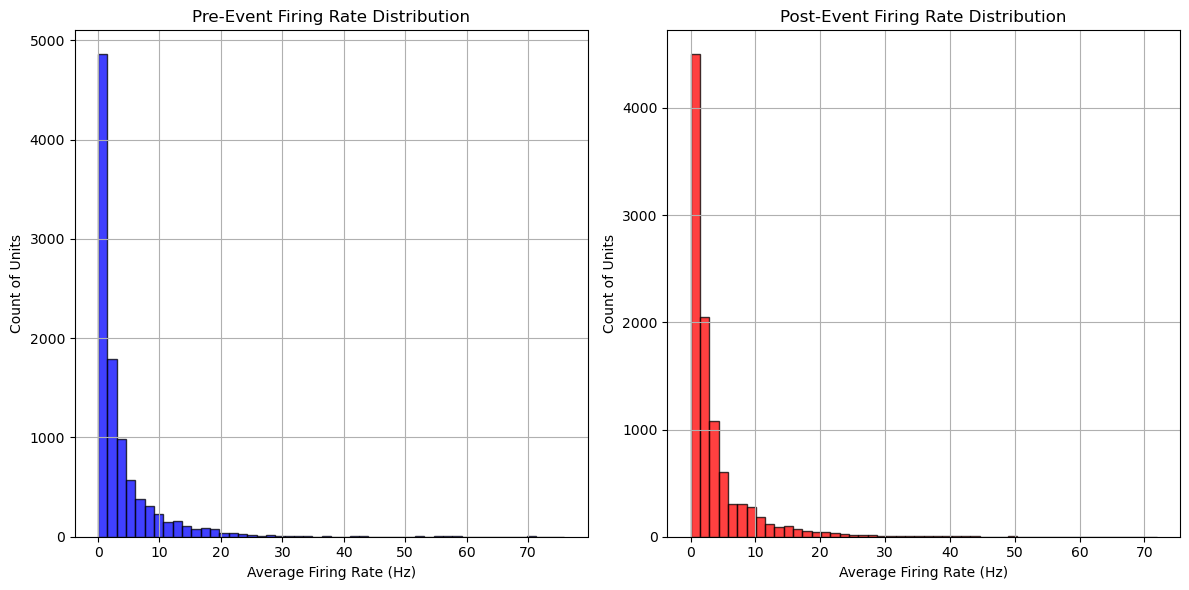

In [15]:
import matplotlib.pyplot as plt

# Assuming pre_event_cols and event_cols are defined as lists of column names
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
event_spikes[pre_event_cols].mean(axis=1).hist(bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Pre-Event Firing Rate Distribution')
plt.xlabel('Average Firing Rate (Hz)')  # Assuming firing rate units are Hz
plt.ylabel('Count of Units')

plt.subplot(1, 2, 2)
event_spikes[event_cols].mean(axis=1).hist(bins=50, alpha=0.75, color='red', edgecolor='black')
plt.title('Post-Event Firing Rate Distribution')
plt.xlabel('Average Firing Rate (Hz)')  # Consistent units
plt.ylabel('Count of Units')

plt.tight_layout()
plt.show()

In [17]:
event_spikes2 = event_spikes.copy()
event_spikes2['mean_pre_event'] = event_spikes2[pre_event_cols].mean(axis=1)

In [18]:
event_spikes2

,Recording,Event name,Event number,Unit number,Pre-event timebin 1,Pre-event timebin 2,Pre-event timebin 3,Pre-event timebin 4,Pre-event timebin 5,Pre-event timebin 6,...,Event timebin 94,Event timebin 95,Event timebin 96,Event timebin 97,Event timebin 98,Event timebin 99,Event timebin 100,mean_pre_event,mean_event,diff_firing_rate
0,20230612_101430_standard_comp_to_training_D1_s...,rewarded,1,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,1.2,-0.2
1,20230612_101430_standard_comp_to_training_D1_s...,rewarded,2,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230612_101430_standard_comp_to_training_D1_s...,rewarded,3,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.3,0.1
3,20230612_101430_standard_comp_to_training_D1_s...,rewarded,4,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.2,-0.1
4,20230612_101430_standard_comp_to_training_D1_s...,rewarded,5,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,16,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,0.6,-1.1
10016,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,17,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2
10017,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,18,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1,-0.1
10018,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,19,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.1,0.3,0.2


In [19]:
event_spikes

,Recording,Event name,Event number,Unit number,Pre-event timebin 1,Pre-event timebin 2,Pre-event timebin 3,Pre-event timebin 4,Pre-event timebin 5,Pre-event timebin 6,...,Event timebin 94,Event timebin 95,Event timebin 96,Event timebin 97,Event timebin 98,Event timebin 99,Event timebin 100,mean_pre_event,mean_event,diff_firing_rate
0,20230612_101430_standard_comp_to_training_D1_s...,rewarded,1,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,1.2,-0.2
1,20230612_101430_standard_comp_to_training_D1_s...,rewarded,2,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20230612_101430_standard_comp_to_training_D1_s...,rewarded,3,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.3,0.1
3,20230612_101430_standard_comp_to_training_D1_s...,rewarded,4,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.2,-0.1
4,20230612_101430_standard_comp_to_training_D1_s...,rewarded,5,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,16,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,0.6,-1.1
10016,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,17,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2
10017,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,18,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1,-0.1
10018,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,19,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.1,0.3,0.2


In [20]:
results

Recording                                                                         Event name  Unit number
20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec       lose        2              {'low': 0.25714582142857145, 'high': 0.8499970...
                                                                                              5              {'low': 0.014285928571428571, 'high': 0.057142...
                                                                                              13             {'low': -1.3071382499999997, 'high': -0.385718...
                                                                                              17             {'low': -0.07142607142857144, 'high': 0.428568...
                                                                                              19             {'low': 0.3642887500000001, 'high': 0.97142553...
                                                                                                   

In [21]:
type(results)

pandas.core.series.Series

In [23]:
resultsdf = results.to_frame()

In [24]:
resultsdf

0
Recording                                          Event name Unit number                                                   
20230612_101430_standard_comp_to_training_D1_su... lose       2            {'low': 0.25714582142857145, 'high': 0.8499970...
                                                              5            {'low': 0.014285928571428571, 'high': 0.057142...
                                                              13           {'low': -1.3071382499999997, 'high': -0.385718...
                                                              17           {'low': -0.07142607142857144, 'high': 0.428568...
                                                              19           {'low': 0.3642887500000001, 'high': 0.97142553...
...                                                                                                                      ...
20230625_112913_standard_comp_to_both_rewarded_... win        60           {'low': -0.02499212500000004, 'high': 1.549992...
                                                              77           {'low': -0.14999850000000003, 'high': 0.149998...
                                                              85           {'low': 0.125001125, 'high': 0.349998875000000...
                                                              99           {'low': -0.1, 'high': -0.09999999999999998, 's...
                                                              105          {'low': -0.6124965000000001, 'high': 0.0874965...

[802 rows x 1 columns]

In [25]:
# Accessing the specific element in the Series
result_specific = results.loc[('20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec', 'lose', 2)]

# Display the result
print(result_specific)

{'low': 0.25714582142857145, 'high': 0.8499970357142855, 'significant': True}


In [27]:
import numpy as np
import pandas as pd
from scipy.stats import bootstrap

# Define a function to analyze firing rates and perform bootstrapping
def analyze_firing_rates_bootstrap(df):
    # Identify pre-event and event columns
    pre_event_cols = [col for col in df.columns if col.startswith('Pre-event')]
    event_cols = [col for col in df.columns if col.startswith('Event') and col not in ['Event name', 'Event number']]
    
    results = []
    
    # Group by 'Recording', 'Event name', 'Unit number'
    grouped = df.groupby(['Recording', 'Event name', 'Unit number'])
    
    for name, group in grouped:
        recording, event_name, unit_number = name
        
        # Calculate mean firing rates before and during the event for each event number
        group['mean_pre_event'] = group[pre_event_cols].mean(axis=1)
        group['mean_event'] = group[event_cols].mean(axis=1)
        
        # Create an array of the data to be bootstrapped
        data = group[['mean_pre_event', 'mean_event']].to_numpy()
        
        # Define a function to calculate the mean difference from resampled data
        def mean_diff(data, axis=None):
            return np.mean(data[:, 1] - data[:, 0], axis=axis)
        
        # Ensure the data is 2-dimensional
        if data.ndim != 2 or data.shape[1] != 2:
            raise ValueError("Data array must be 2-dimensional with two columns.")
        
        # Using the bootstrap function to calculate the confidence interval
        res = bootstrap((data,), mean_diff, vectorized=True, n_resamples=1000, method='percentile', confidence_level=0.95)
        
        # Extract the confidence interval
        ci_lower, ci_upper = res.confidence_interval.low, res.confidence_interval.high
        
        # Determine significance result
        if ci_lower > 0:
            significance_result = 'Increase'
        elif ci_upper < 0:
            significance_result = 'Decrease'
        else:
            significance_result = 'Not Significant'
        
        # Append the result
        results.append({
            'Recording': recording,
            'Event name': event_name,
            'Unit number': unit_number,
            'Significance Result': significance_result,
            'CI Lower': ci_lower,
            'CI Upper': ci_upper
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# Assuming 'event_spikes' is your DataFrame loaded with the appropriate data
results_df = analyze_firing_rates_bootstrap(event_spikes)
results_df

,Recording,Event name,Unit number,Significance Result,CI Lower,CI Upper
0,20230612_101430_standard_comp_to_training_D1_s...,lose,2,Decrease,-0.493393,-0.242321
1,20230612_101430_standard_comp_to_training_D1_s...,lose,5,Not Significant,-0.012143,0.069286
2,20230612_101430_standard_comp_to_training_D1_s...,lose,13,Not Significant,-0.260536,0.424821
3,20230612_101430_standard_comp_to_training_D1_s...,lose,17,Not Significant,-0.034643,0.820357
4,20230612_101430_standard_comp_to_training_D1_s...,lose,19,Decrease,-1.215893,-0.462679
...,...,...,...,...,...,...
797,20230625_112913_standard_comp_to_both_rewarded...,win,60,Decrease,-0.269375,-0.055625
798,20230625_112913_standard_comp_to_both_rewarded...,win,77,Not Significant,-0.105000,0.180000
799,20230625_112913_standard_comp_to_both_rewarded...,win,85,Decrease,-0.319375,-0.105625
800,20230625_112913_standard_comp_to_both_rewarded...,win,99,Not Significant,-0.143750,0.093750


In [29]:
results_df['Significance Result'].value_counts()

Significance Result
Not Significant    282
Decrease           260
Increase           260
Name: count, dtype: int64

In [30]:
import numpy as np
import pandas as pd
from scipy.stats import bootstrap

# Define a function to analyze firing rates and perform bootstrapping
def analyze_firing_rates_bootstrap(df):
    # Identify pre-event and event columns
    pre_event_cols = [col for col in df.columns if col.startswith('Pre-event')]
    event_cols = [col for col in df.columns if col.startswith('Event') and col not in ['Event name', 'Event number']]
    
    results = []
    
    # Group by 'Recording', 'Event name', 'Unit number'
    grouped = df.groupby(['Recording', 'Event name', 'Unit number'])
    
    for name, group in grouped:
        recording, event_name, unit_number = name
        
        # Calculate mean firing rates before and during the event for each event number
        group['mean_pre_event'] = group[pre_event_cols].mean(axis=1)
        group['mean_event'] = group[event_cols].mean(axis=1)
        
        # Create an array of the data to be bootstrapped
        data = group[['mean_pre_event', 'mean_event']].to_numpy()
        
        # Define a function to calculate the mean difference from resampled data
        def mean_diff(data, axis=None):
            return np.mean(data[:, 1] - data[:, 0], axis=axis)
        
        # Ensure the data is 2-dimensional
        if data.ndim != 2 or data.shape[1] != 2:
            raise ValueError("Data array must be 2-dimensional with two columns.")
        
        # Using the bootstrap function to calculate the confidence interval
        res = bootstrap((data,), mean_diff, vectorized=True, n_resamples=10000, method='percentile', confidence_level=0.95)
        
        # Extract the confidence interval
        ci_lower, ci_upper = res.confidence_interval.low, res.confidence_interval.high
        
        # Determine significance result
        if ci_lower > 0:
            significance_result = 'Increase'
        elif ci_upper < 0:
            significance_result = 'Decrease'
        else:
            significance_result = 'Not Significant'
        
        # Append the result
        results.append({
            'Recording': recording,
            'Event name': event_name,
            'Unit number': unit_number,
            'Significance Result': significance_result,
            'CI Lower': ci_lower,
            'CI Upper': ci_upper
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# Assuming 'event_spikes' is your DataFrame loaded with the appropriate data
results_df = analyze_firing_rates_bootstrap(event_spikes)
results_df['Significance Result'].value_counts()

Significance Result
Not Significant    312
Decrease           250
Increase           240
Name: count, dtype: int64

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import bootstrap

# Define a function to analyze firing rates and perform bootstrapping
def analyze_firing_rates_bootstrap(df):
    # Identify pre-event and event columns
    pre_event_cols = [col for col in df.columns if col.startswith('Pre-event')]
    event_cols = [col for col in df.columns if col.startswith('Event') and col not in ['Event name', 'Event number']]
    
    results = []
    
    # Group by 'Recording', 'Event name', 'Unit number'
    grouped = df.groupby(['Recording', 'Event name', 'Unit number'])
    
    for name, group in grouped:
        recording, event_name, unit_number = name
        
        # Calculate mean firing rates before and during the event for each event number
        group['mean_pre_event'] = group[pre_event_cols].mean(axis=1)
        group['mean_event'] = group[event_cols].mean(axis=1)
        
        # Create an array of the data to be bootstrapped
        data = group[['mean_pre_event', 'mean_event']].to_numpy()
        
        # Define a function to calculate the mean difference from resampled data
        def mean_diff(data, axis=None):
            return np.mean(data[:, 1] - data[:, 0], axis=axis)
        
        # Ensure the data is 2-dimensional
        if data.ndim != 2 or data.shape[1] != 2:
            raise ValueError("Data array must be 2-dimensional with two columns.")
        
        # Using the bootstrap function to calculate the confidence interval
        res = bootstrap((data,), mean_diff, vectorized=True, n_resamples=100000, method='percentile', confidence_level=0.95)
        
        # Extract the confidence interval
        ci_lower, ci_upper = res.confidence_interval.low, res.confidence_interval.high
        
        # Determine significance result
        if ci_lower > 0:
            significance_result = 'Increase'
        elif ci_upper < 0:
            significance_result = 'Decrease'
        else:
            significance_result = 'Not Significant'
        
        # Append the result
        results.append({
            'Recording': recording,
            'Event name': event_name,
            'Unit number': unit_number,
            'Significance Result': significance_result,
            'CI Lower': ci_lower,
            'CI Upper': ci_upper
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# Assuming 'event_spikes' is your DataFrame loaded with the appropriate data
results_df = analyze_firing_rates_bootstrap(event_spikes)
results_df['Significance Result'].value_counts()

Significance Result
Not Significant    300
Decrease           257
Increase           245
Name: count, dtype: int64

In [33]:
import numpy as np
import pandas as pd
from scipy.stats import bootstrap

# Define a function to analyze firing rates and perform bootstrapping
def analyze_firing_rates_bootstrap(df):
    # Identify pre-event and event columns
    pre_event_cols = [col for col in df.columns if col.startswith('Pre-event')]
    event_cols = [col for col in df.columns if col.startswith('Event') and col not in ['Event name', 'Event number']]
    
    results = []
    
    # Group by 'Recording', 'Event name', 'Unit number'
    grouped = df.groupby(['Recording', 'Event name', 'Unit number'])
    
    for name, group in grouped:
        recording, event_name, unit_number = name
        
        # Calculate mean firing rates before and during the event for each event number
        group['mean_pre_event'] = group[pre_event_cols].mean(axis=1)
        group['mean_event'] = group[event_cols].mean(axis=1)
        
        # Create an array of the data to be bootstrapped
        data = group[['mean_pre_event', 'mean_event']].to_numpy()
        
        # Define a function to calculate the mean difference from resampled data
        def mean_diff(data, axis=None):
            return np.mean(data[:, 1] - data[:, 0], axis=axis)
        
        # Ensure the data is 2-dimensional
        if data.ndim != 2 or data.shape[1] != 2:
            raise ValueError("Data array must be 2-dimensional with two columns.")
        
        # Using the bootstrap function to calculate the confidence interval
        res = bootstrap((data,), mean_diff, vectorized=True, n_resamples=10000, method='percentile', confidence_level=0.99)
        
        # Extract the confidence interval
        ci_lower, ci_upper = res.confidence_interval.low, res.confidence_interval.high
        
        # Determine significance result
        if ci_lower > 0:
            significance_result = 'Increase'
        elif ci_upper < 0:
            significance_result = 'Decrease'
        else:
            significance_result = 'Not Significant'
        
        # Append the result
        results.append({
            'Recording': recording,
            'Event name': event_name,
            'Unit number': unit_number,
            'Significance Result': significance_result,
            'CI Lower': ci_lower,
            'CI Upper': ci_upper
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# Assuming 'event_spikes' is your DataFrame loaded with the appropriate data
results_df = analyze_firing_rates_bootstrap(event_spikes)
results_df['Significance Result'].value_counts()

Significance Result
Not Significant    321
Increase           246
Decrease           235
Name: count, dtype: int64

In [34]:
import numpy as np
import pandas as pd
from scipy.stats import bootstrap

# Define a function to analyze firing rates and perform bootstrapping
def analyze_firing_rates_bootstrap(df):
    # Identify pre-event and event columns
    pre_event_cols = [col for col in df.columns if col.startswith('Pre-event')]
    event_cols = [col for col in df.columns if col.startswith('Event') and col not in ['Event name', 'Event number']]
    
    results = []
    
    # Group by 'Recording', 'Event name', 'Unit number'
    grouped = df.groupby(['Recording', 'Event name', 'Unit number'])
    
    for name, group in grouped:
        recording, event_name, unit_number = name
        
        # Calculate mean firing rates before and during the event for each event number
        group['mean_pre_event'] = group[pre_event_cols].mean(axis=1)
        group['mean_event'] = group[event_cols].mean(axis=1)
        
        # Create an array of the data to be bootstrapped
        data = group[['mean_pre_event', 'mean_event']].to_numpy()
        
        # Define a function to calculate the mean difference from resampled data
        def mean_diff(data, axis=None):
            return np.mean(data[:, 1] - data[:, 0], axis=axis)
        
        # Ensure the data is 2-dimensional
        if data.ndim != 2 or data.shape[1] != 2:
            raise ValueError("Data array must be 2-dimensional with two columns.")
        
        # Using the bootstrap function to calculate the confidence interval
        res = bootstrap((data,), mean_diff, vectorized=True, n_resamples=10000, method='percentile', confidence_level=0.999)
        
        # Extract the confidence interval
        ci_lower, ci_upper = res.confidence_interval.low, res.confidence_interval.high
        
        # Determine significance result
        if ci_lower > 0:
            significance_result = 'Increase'
        elif ci_upper < 0:
            significance_result = 'Decrease'
        else:
            significance_result = 'Not Significant'
        
        # Append the result
        results.append({
            'Recording': recording,
            'Event name': event_name,
            'Unit number': unit_number,
            'Significance Result': significance_result,
            'CI Lower': ci_lower,
            'CI Upper': ci_upper
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# Assuming 'event_spikes' is your DataFrame loaded with the appropriate data
results_df = analyze_firing_rates_bootstrap(event_spikes)
results_df['Significance Result'].value_counts()

Significance Result
Not Significant    290
Increase           266
Decrease           246
Name: count, dtype: int64

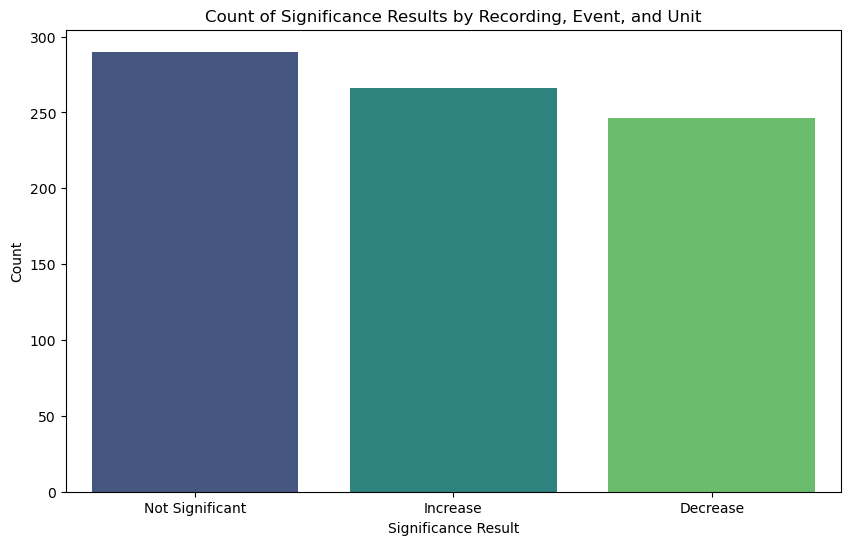

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each significance result
significance_counts = results_df['Significance Result'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=significance_counts.index, y=significance_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Significance Result')
plt.ylabel('Count')
plt.title('Count of Significance Results by Recording, Event, and Unit')

# Display the plot
plt.show()

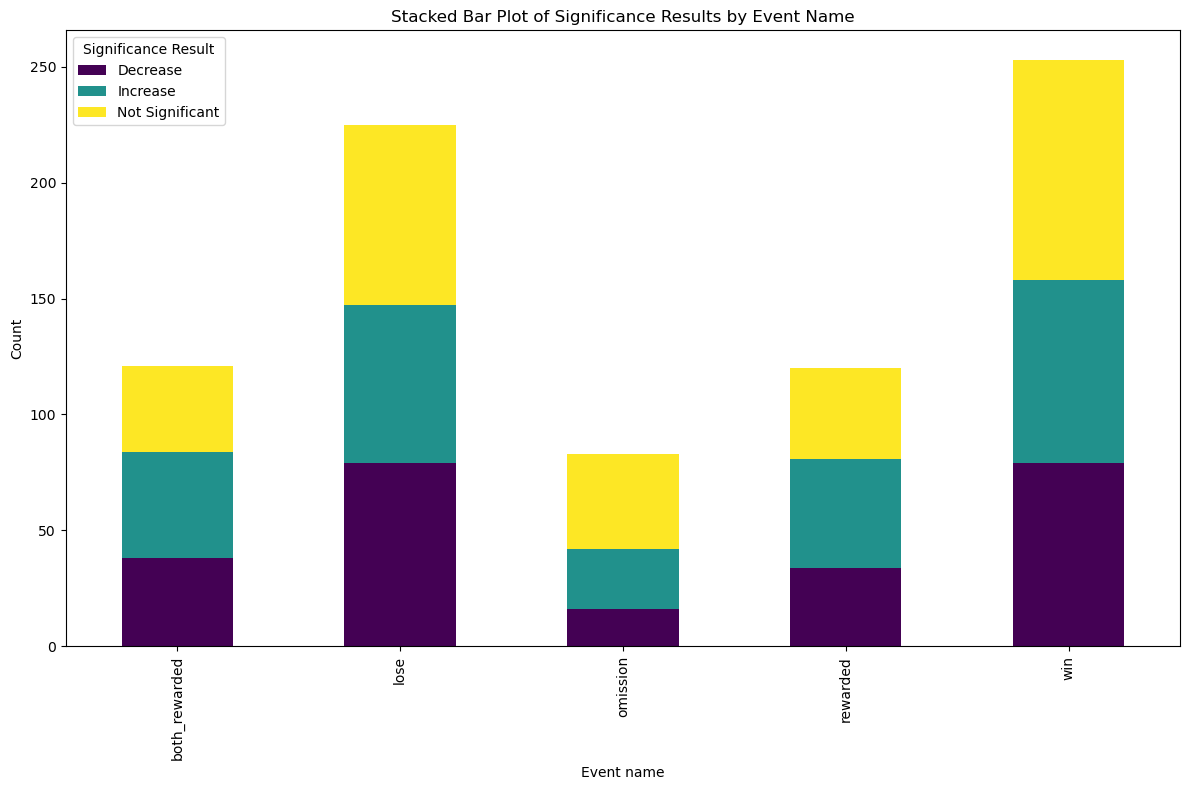

In [36]:
# Pivot the data to get counts for each combination of Event name and Significance Result
pivot_table = results_df.pivot_table(index='Event name', columns='Significance Result', aggfunc='size', fill_value=0)

# Plot the stacked bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add labels and title
plt.xlabel('Event name')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Significance Results by Event Name')
plt.legend(title='Significance Result')

# Display the plot
plt.tight_layout()
plt.show()

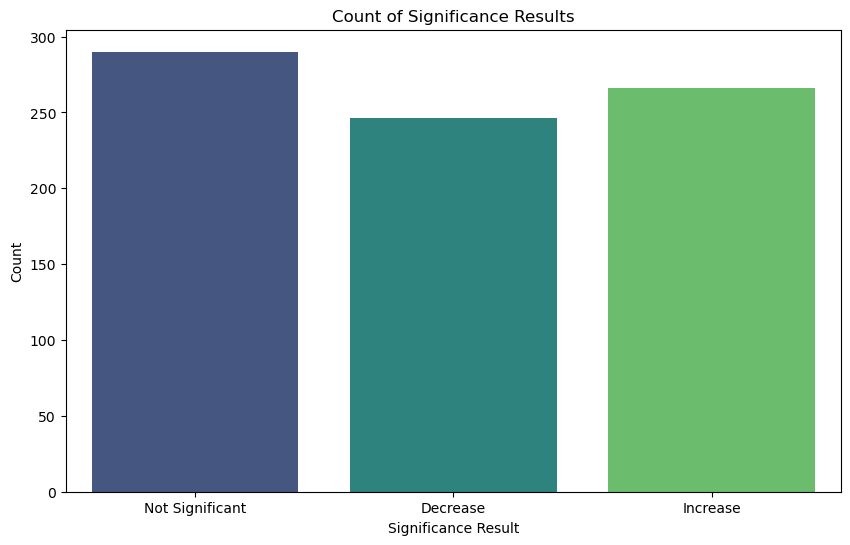

In [37]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Significance Result', data=results_df, palette='viridis')

# Add labels and title
plt.xlabel('Significance Result')
plt.ylabel('Count')
plt.title('Count of Significance Results')

# Display the plot
plt.show()

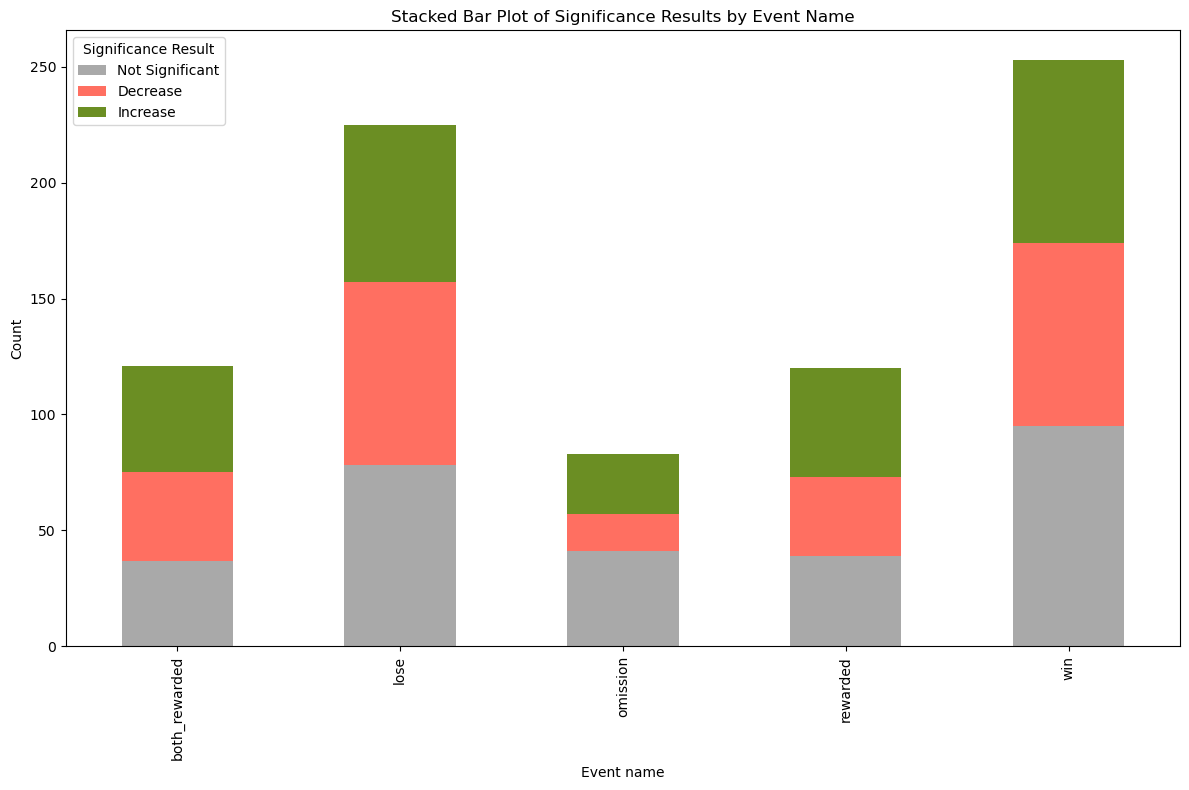

In [38]:
import matplotlib.pyplot as plt

# Define the custom color palette
colors = {
    'Not Significant': '#A9A9A9',  # Grey
    'Decrease': '#FF6F61',         # Coral/Red
    'Increase': '#6B8E23'          # Olive/Green
}

# Pivot the data to get counts for each combination of Event name and Significance Result
pivot_table = results_df.pivot_table(index='Event name', columns='Significance Result', aggfunc='size', fill_value=0)

# Ensure the columns are ordered as 'Not Significant', 'Decrease', 'Increase'
pivot_table = pivot_table[['Not Significant', 'Decrease', 'Increase']]

# Plot the stacked bar plot
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors[col] for col in pivot_table.columns])

# Add labels and title
plt.xlabel('Event name')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Significance Results by Event Name')
plt.legend(title='Significance Result')

# Display the plot
plt.tight_layout()
plt.show()

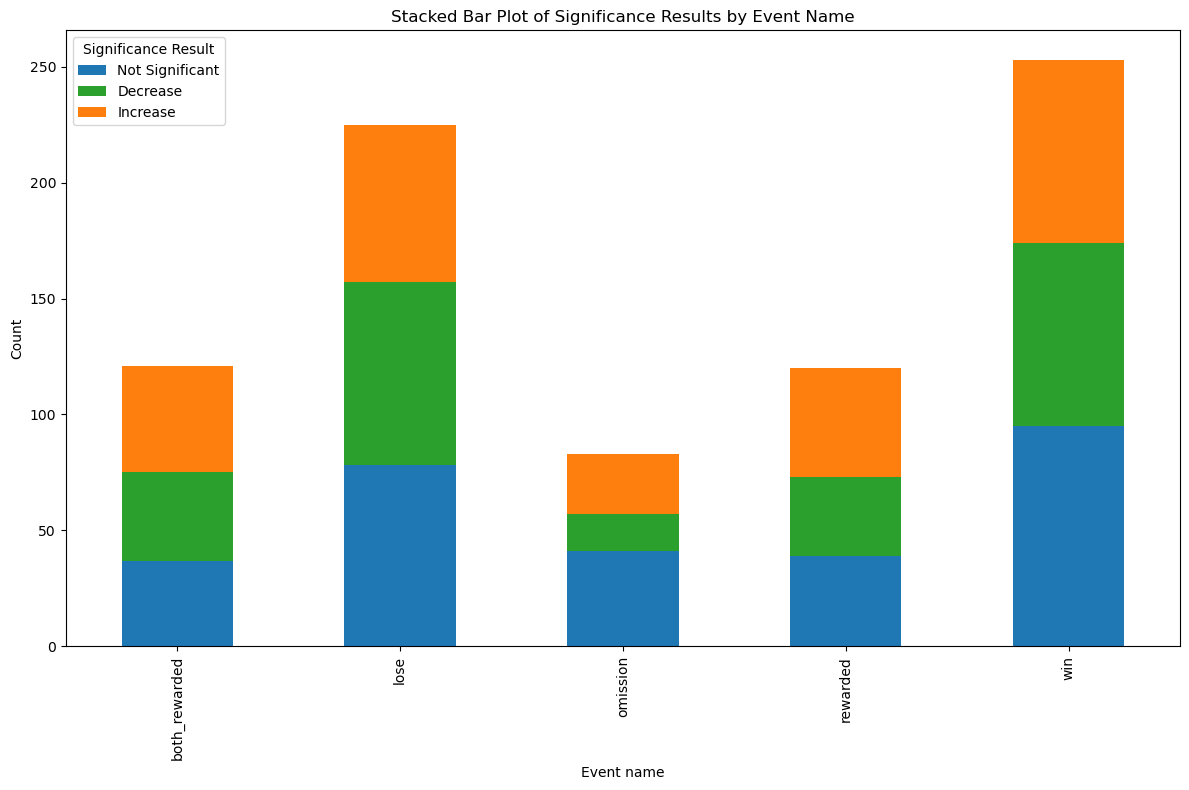

In [39]:
# Define the custom color palette
colors = {
    'Not Significant': '#1f77b4',  # Dark blue
    'Decrease': '#2ca02c',         # Green
    'Increase': '#ff7f0e'          # Orange
}

# Pivot the data to get counts for each combination of Event name and Significance Result
pivot_table = results_df.pivot_table(index='Event name', columns='Significance Result', aggfunc='size', fill_value=0)

# Ensure the columns are ordered as 'Not Significant', 'Decrease', 'Increase'
pivot_table = pivot_table[['Not Significant', 'Decrease', 'Increase']]

# Plot the stacked bar plot
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors[col] for col in pivot_table.columns])

# Add labels and title
plt.xlabel('Event name')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Significance Results by Event Name')
plt.legend(title='Significance Result')

# Display the plot
plt.tight_layout()
plt.show()

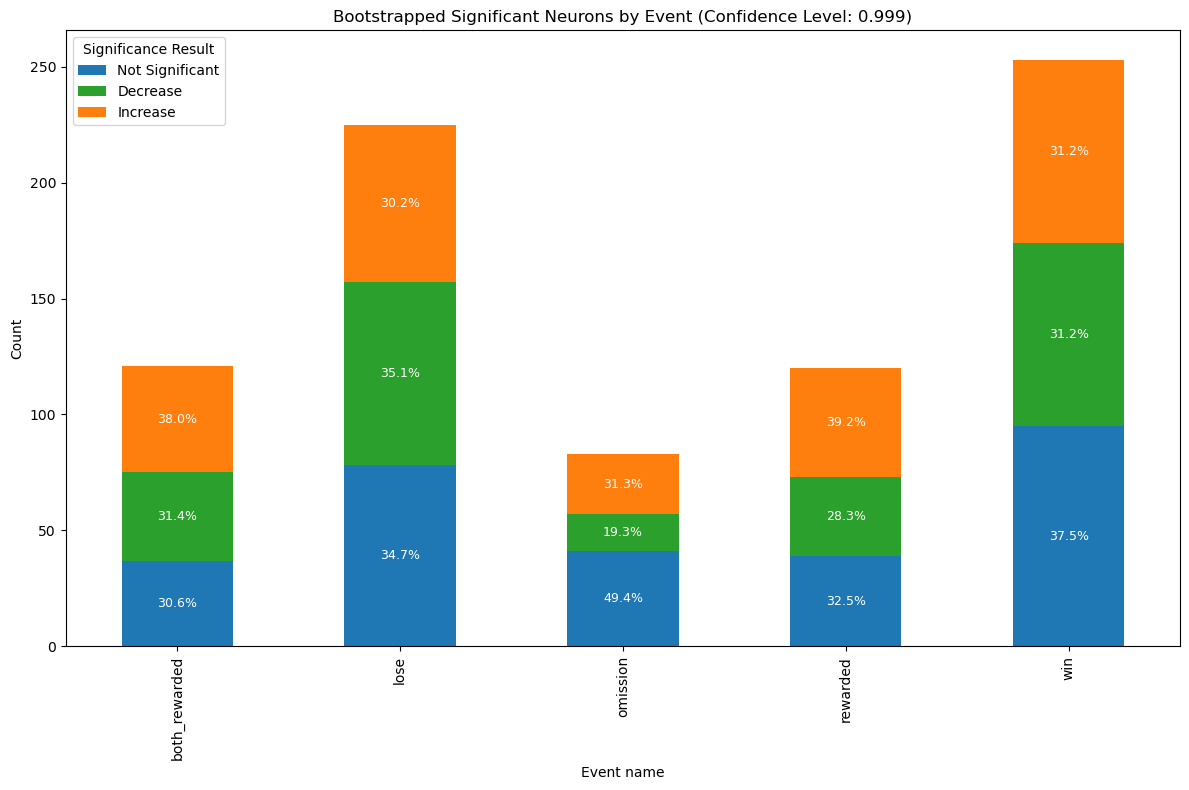

In [41]:
import matplotlib.pyplot as plt

# Define the custom color palette
colors = {
    'Not Significant': '#1f77b4',  # Dark blue
    'Decrease': '#2ca02c',         # Green
    'Increase': '#ff7f0e'          # Orange
}

# Pivot the data to get counts for each combination of Event name and Significance Result
pivot_table = results_df.pivot_table(index='Event name', columns='Significance Result', aggfunc='size', fill_value=0)

# Ensure the columns are ordered as 'Not Significant', 'Decrease', 'Increase'
pivot_table = pivot_table[['Not Significant', 'Decrease', 'Increase']]

# Plot the stacked bar plot
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors[col] for col in pivot_table.columns])

# Add labels and title
plt.xlabel('Event name')
plt.ylabel('Count')
plt.title('Bootstrapped Significant Neurons by Event (Confidence Level: 0.999)')
plt.legend(title='Significance Result')

# Add percentages within each block
for i, (index, row) in enumerate(pivot_table.iterrows()):
    total = row.sum()
    cumulative = 0
    for col in pivot_table.columns:
        height = row[col]
        percentage = height / total * 100
        ax.text(i, cumulative + height / 2, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=9)
        cumulative += height

# Display the plot
plt.tight_layout()
plt.show()